In [30]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\LENOVO THINKPAD 13\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [20]:
file_path = r"C:\Users\LENOVO THINKPAD 13\Downloads\Random Forest (1)\glass.xlsx"
# Load the 'Heart_disease' sheet
df = pd.read_excel(file_path, sheet_name='glass')

# Preview the first 5 rows
print(df.head())

# Check data types and shape
print(df.info())
df.shape

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


(214, 10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [25]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [26]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [27]:
df.duplicated().sum()

np.int64(1)

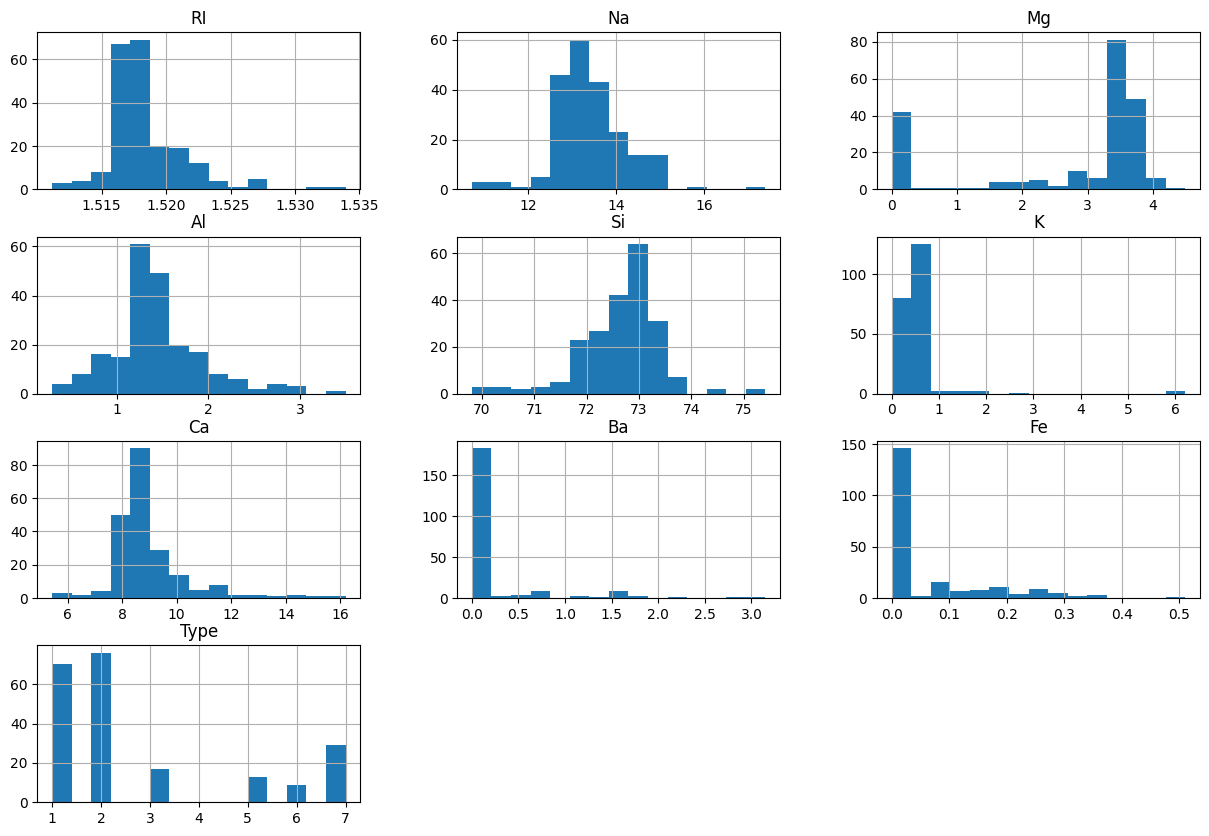

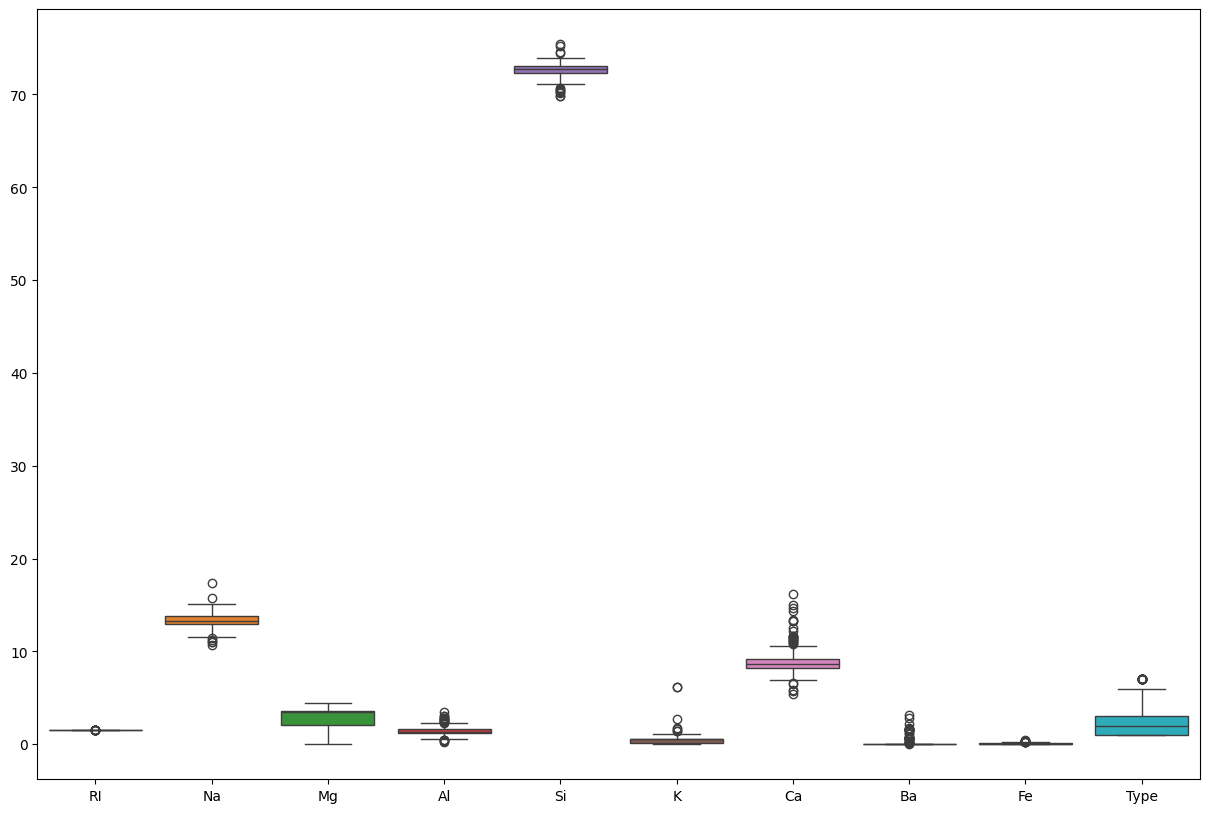

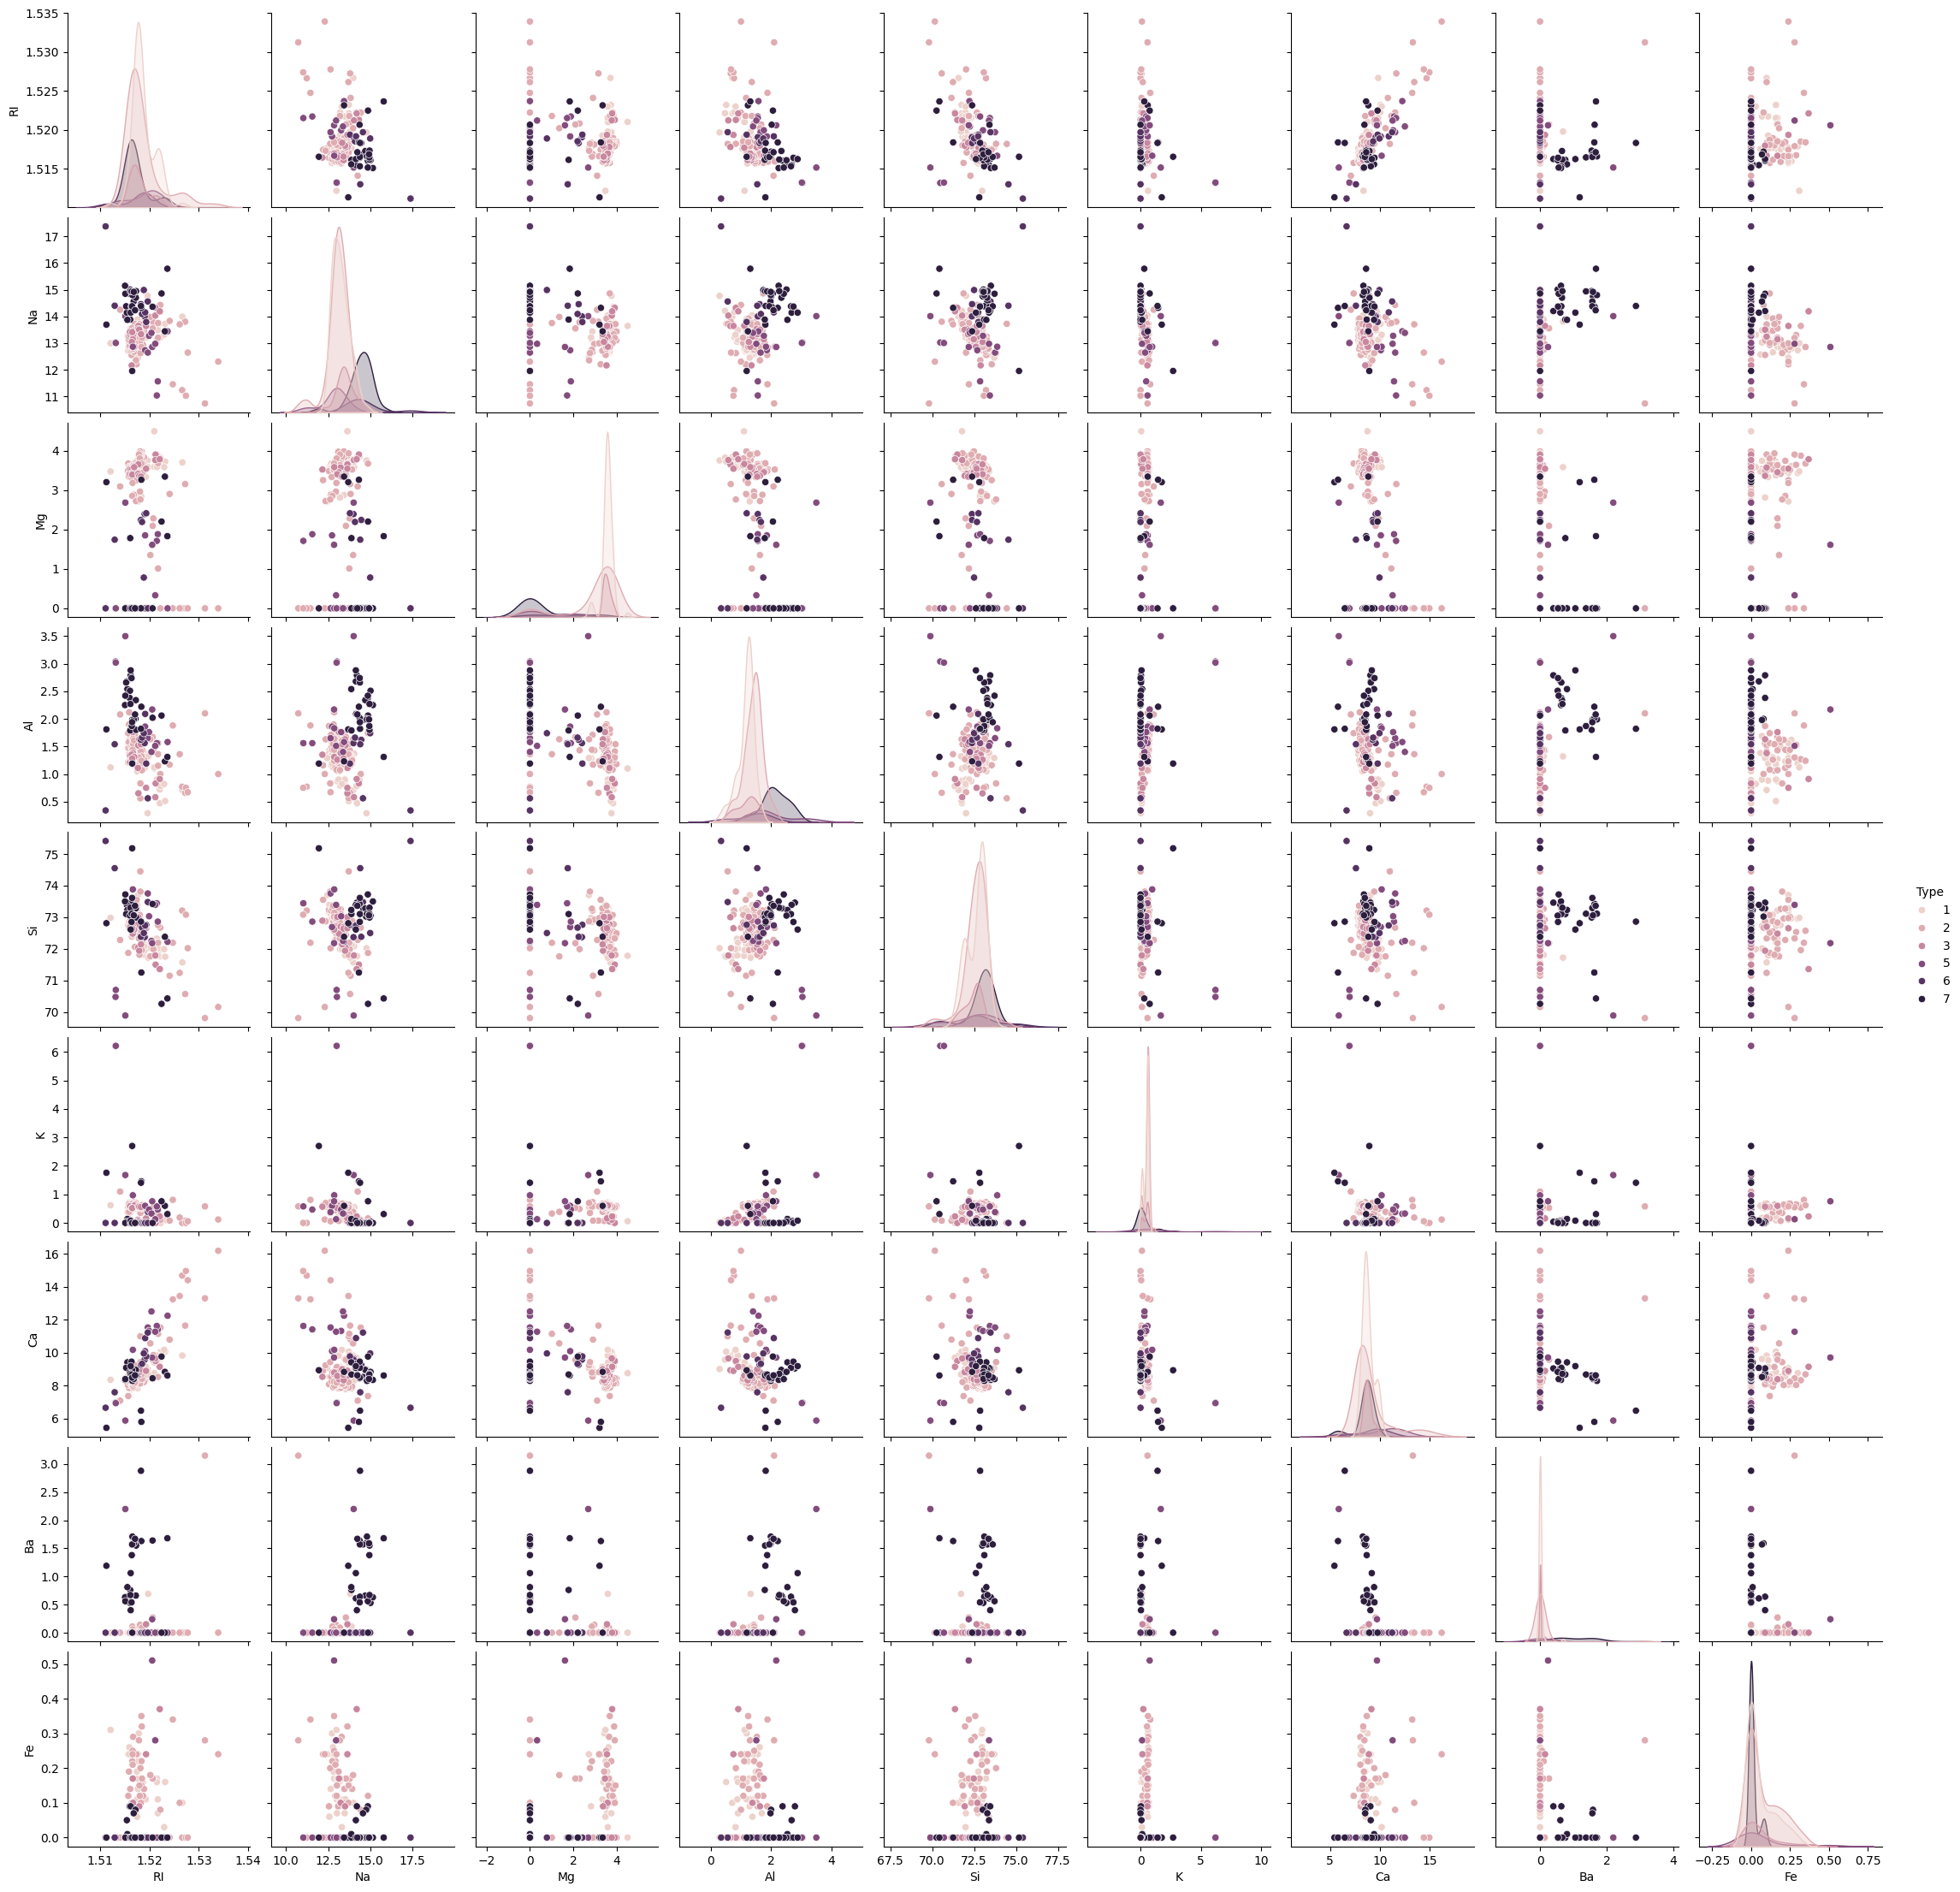

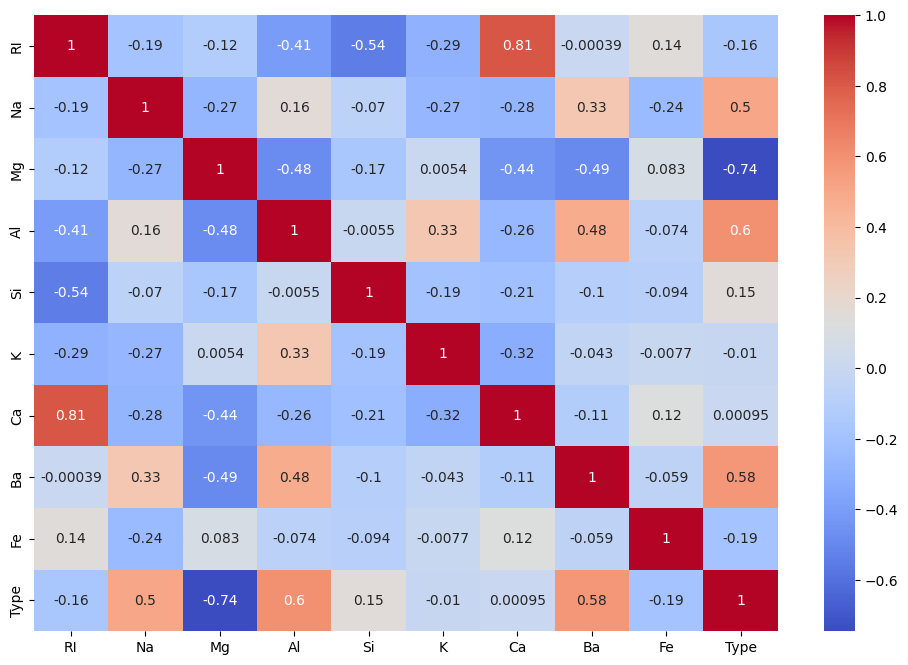

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all features
df.hist(bins=15, figsize=(15,10))
plt.show()

# Boxplots to check outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

# Pair plot to see relationships
sns.pairplot(df, hue='Type')  # assuming 'Type' is the target column
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # for handling imbalance

# Encode target if categorical
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Split features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.85      0.73      0.79        15
           2       0.92      0.80      0.86        15
           3       0.94      0.94      0.94        16
           4       1.00      1.00      1.00        16
           5       0.88      1.00      0.94        15

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92

Confusion Matrix:
 [[13  1  1  0  0  0]
 [ 2 11  0  1  0  1]
 [ 2  1 12  0  0  0]
 [ 0  0  0 15  0  1]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0 15]]


In [33]:
X_train, X_test, y_train, y_test


(array([[ 1.64499165e+00, -2.55895506e-01, -1.43431613e+00, ...,
          2.33950989e+00, -4.33628479e-01, -5.11034023e-01],
        [-2.11798900e-03, -2.74922297e-01,  8.05896211e-01, ...,
         -1.49821301e-01, -4.33628479e-01, -1.05193530e-01],
        [ 3.32902723e-01,  4.36900699e-01,  1.64639375e-01, ...,
          3.27942203e-01, -4.33628479e-01, -5.11034023e-01],
        ...,
        [ 7.80746541e-01, -9.67556316e-01, -3.17945651e-01, ...,
          4.91921282e-01, -8.37312737e-02,  3.57591033e+00],
        [ 6.27589272e-01, -1.65606942e+00, -2.23489165e-01, ...,
          1.02562574e+00, -4.33628479e-01, -5.11034023e-01],
        [ 8.25067785e-02, -9.32622908e-01,  1.02098375e+00, ...,
         -3.19721692e-01, -4.33628479e-01,  3.20117762e+00]],
       shape=(364, 9)),
 array([[ 1.34233566e+00,  7.36764596e-01,  1.13273965e+00,
         -1.26594560e+00, -1.53751551e+00, -4.58100293e-01,
          1.36102395e-01, -4.33628479e-01,  1.54779056e+00],
        [ 5.64329278e-01,

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Bagging with Decision Tree as base
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # <- updated parameter
    n_estimators=50,
    random_state=42
)

bagging_model.fit(X_train, y_train)

# Predictions
y_pred_bag = bagging_model.predict(X_test)

# Evaluation
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Classification Report:\n", classification_report(y_test, y_pred_bag))



Bagging Accuracy: 0.8804347826086957
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.91      0.67      0.77        15
           2       0.93      0.87      0.90        15
           3       0.94      0.94      0.94        16
           4       0.94      1.00      0.97        16
           5       0.88      0.93      0.90        15

    accuracy                           0.88        92
   macro avg       0.89      0.88      0.88        92
weighted avg       0.89      0.88      0.88        92



| Feature            | Bagging (Bootstrap Aggregating)                                | Boosting                                                |
| ------------------ | -------------------------------------------------------------- | ------------------------------------------------------- |
| Approach           | Parallel training of multiple models                           | Sequential training of models                           |
| Goal               | Reduce variance                                                | Reduce bias                                             |
| How it works       | Train each model on a random subset of data (with replacement) | Train each model on full data, focus on previous errors |
| Voting / Averaging | Final prediction by majority vote (classification) or average  | Weighted vote or sum of predictions                     |
| Example Models     | Random Forest                                                  | AdaBoost, Gradient Boosting, XGBoost                    |


2️⃣ Handling Imbalance in Data

If your target classes are imbalanced (some types of glass have fewer samples):

Resampling Techniques

Oversampling: Duplicate or synthesize minority class (e.g., SMOTE)

Undersampling: Remove samples from majority class

Algorithm Parameter Adjustment

Some models allow class_weight='balanced' (e.g., RandomForest, XGBoost)

Evaluation Metrics

Don’t rely on accuracy alone

Use precision, recall, F1-score to measure performance for minority classes